In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns; sns.set()

#Configure Defaults
import warnings
warnings.filterwarnings('ignore')

In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측치 비율' : (df.isnull().sum()/df.shape[0]).round(4)*100,
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [8]:
txt = '%    ?필 땐 /장미꽃:처럼!, 흩날릴\t 땐 !벚꽃처럼, $질 땐 나팔꽃처럼'
txt2 = '!아름다운 ?그 <순간처럼>, !어짜피 %이것 밖에 난 못해'
txt3 = '너를 %%사랑하는 것% 밖엔 못해'
doc = pd.Series([txt, txt2, txt3], dtype="string").to_frame()
doc

,0
0,"% ?필 땐 /장미꽃:처럼!, 흩날릴 땐 !벚꽃처럼, $질 땐 나팔꽃처럼"
1,"!아름다운 ?그 <순간처럼>, !어짜피 %이것 밖에 난 못해"
2,너를 %%사랑하는 것% 밖엔 못해


In [5]:
import re
p = re.compile('처럼')
print(p.findall(txt))

['처럼', '처럼', '처럼']


In [6]:
regex = ['[%]', '[?]', '[!]', '[/]', '[$]', '[>]', '[<]', '[:]', '\t']
def RegularClear(regex) :
    for pattern in regex :
        p = re.compile(pattern)
        doc[0] = doc[0].apply(lambda x : re.sub(p, '', str(x)))
    return doc[0]

In [9]:
regex = ['[%]', '[?]', '[!]', '[/]', '[$]', '[>]', '[<]', '[:]', '\t']
def RegularClear(regex) :
    for pattern in regex :
        p = re.compile(pattern)
        doc[0] = doc[0].apply(lambda x : re.sub(p, '', str(x)))
    return doc[0]

In [10]:
RegularClear(regex)
doc

0        필 땐 장미꽃처럼, 흩날릴 땐 벚꽃처럼, 질 땐 나팔꽃처럼
1             아름다운 그 순간처럼, 어짜피 이것 밖에 난 못해
2                         너를 사랑하는 것 밖엔 못해
Name: 0, dtype: object

,0
0,"필 땐 장미꽃처럼, 흩날릴 땐 벚꽃처럼, 질 땐 나팔꽃처럼"
1,"아름다운 그 순간처럼, 어짜피 이것 밖에 난 못해"
2,너를 사랑하는 것 밖엔 못해


In [3]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
X = np.array([[0, 1], [2, 3]])
X

array([[0, 1],
       [2, 3]])

In [24]:
np.sum(X, axis=1)

array([1, 5])

In [29]:
np.log1p(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

In [13]:
transformer = FunctionTransformer(np.log1p, validate=True)
transformer.fit(X)
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

In [47]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
]
measurements
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

vec.fit_transform(measurements).toarray()

vec.get_feature_names()

[{'city': 'Dubai', 'temperature': 33.0},
 {'city': 'London', 'temperature': 12.0},
 {'city': 'San Francisco', 'temperature': 18.0}]

array([[ 1.,  0.,  0., 33.],
       [ 0.,  1.,  0., 12.],
       [ 0.,  0.,  1., 18.]])

['city=Dubai', 'city=London', 'city=San Francisco', 'temperature']

In [41]:
measurements
type(measurements)
pd.DataFrame(measurements)

[{'city': 'Dubai', 'temperature': 33.0},
 {'city': 'London', 'temperature': 12.0},
 {'city': 'San Francisco', 'temperature': 18.0}]

list

,city,temperature
0,Dubai,33.0
1,London,12.0
2,San Francisco,18.0


In [46]:
city = [('Dubai',  33.0), ('London', 12.0), ('San Francisco', 18.0)]
city

[('Dubai', 33.0), ('London', 12.0), ('San Francisco', 18.0)]

In [66]:
city = ['Dubai, Dubai', 'London, Dubai', 'SanFrancisco, Seoul']
city

['Dubai, Dubai', 'London, Dubai', 'SanFrancisco, Seoul']

In [67]:
X = vectorizer.fit_transform(city)
X
X.toarray()
vectorizer.get_feature_names()

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

array([[2, 0, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 1]], dtype=int64)

['dubai', 'london', 'sanfrancisco', 'seoul']

In [54]:
vec.fit_transform(city)

AttributeError: 'str' object has no attribute 'items'

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer

CountVectorizer()

In [61]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
corpus
X = vectorizer.fit_transform(corpus)
X
X.toarray()
vectorizer.get_feature_names()

['This is the first document.',
 'This is the second second document.',
 'And the third one.',
 'Is this the first document?']

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

## Scikit learn example
https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

In [69]:
# Author: Pedro Morales <part.morales@gmail.com>
#
# License: BSD 3 clause

import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

# Load data from https://www.openml.org/d/40945
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

# Alternatively X and y can be obtained directly from the frame attribute:
# X = titanic.frame.drop('survived', axis=1)
# y = titanic.frame['survived']

In [70]:
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncod

model score: 0.790


In [71]:
subset_feature = ['embarked', 'sex', 'pclass', 'age', 'fare']
X = X[subset_feature]

https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html

In [72]:
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))
])

# Reproduce the identical fit/score process
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncod

model score: 0.794


In [8]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
}

grid_search = GridSearchCV(clf, param_grid, verbose= 1, cv=10)
grid_search.fit(X_train, y_train)

print(("best logistic regression from grid search: %.3f" % grid_search.score(X_test, y_test)))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.5s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                             

best logistic regression from grid search: 0.794


## End

In [9]:
df= pd.read_pickle('../data/MCR2019.pkl')
df['구매'] = df.iloc[:,-1]

null_percent = df.isnull().mean()*100
null_filtered = null_percent[null_percent > 60].index
df = df.drop(null_filtered, axis =1) # df.drop(missing_col, axis =1, inplace=True)
col_name = ['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수', 
            '인터넷평일', '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일',
            'TV1', 'TV2', 'TV3', 'TV4', '드라마1', '드라마2', '드라마3', '구매의향', '구매']
df.columns = col_name
del df['구매의향']

df.head(3)

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일주말,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매
0,1,14,1,6,6,8,3,2,99,0.0,...,150.0,180.0,4,7.0,9.0,11.0,6.0,9.0,10.0,4
1,1,14,1,6,6,8,1,2,99,30.0,...,40.0,40.0,3,4.0,7.0,NaN,4.0,6.0,11.0,2
2,1,14,1,6,6,8,2,2,99,90.0,...,180.0,180.0,4,6.0,7.0,9.0,1.0,4.0,12.0,5


In [10]:
df['구매의향'] = 0
buy = df[((df['구매'] == 4) | (df['구매'] == 5) | (df['구매'] == 6))].index
df.loc[buy, '구매의향'] = 1
del df['구매']
df = df.rename(columns={'구매의향': '구매'})
print('구매비율 {:0.2f}%'.format(df['구매'].value_counts()[1]/len(df)*100))

구매비율 34.73%


In [11]:
categorical_features = ['성별', '지역', '직업', '가구소득', '학력', '주거형태', '결혼']
numeric_features = [item for item in df.drop('구매', axis=1).columns if item not in categorical_features]
#numeric_features = (df.drop('구매', axis=1).dtypes == 'float').index.tolist()
','.join(numeric_features)
','.join(categorical_features)

'연령,자녀수,인터넷평일,인터넷주말,인터넷휴일,모바일평일,모바일주말,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3'

'성별,지역,직업,가구소득,학력,주거형태,결혼'

In [12]:
for col in numeric_features : 
        df[col] = df[col].astype('float64')
for col in categorical_features : 
        df[col] = df[col].astype('category')

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [14]:
X = df.drop(['구매'], axis=1)
y = df['구매']

In [15]:
X.columns
X.shape

Index(['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수', '인터넷평일',
       '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일', 'TV1', 'TV2', 'TV3', 'TV4',
       '드라마1', '드라마2', '드라마3'],
      dtype='object')

(4000, 22)

In [20]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfe_selector = RFE(estimator=RandomForestClassifier(),
                   n_features_to_select=25, step=20)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
 

kf = KFold(n_splits=5)
model = RandomForestClassifier() 

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rfe_sdelector', rfe_selector),
                      ('classifier', model)])

In [26]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['연령', '자녀수', '인터넷평일',
                                                   '인터넷주말', '인터넷휴일', '모바일평일',
                                                   '모바일주말', '모바일휴일', 'TV1',
                                                   'TV2', 'TV3', 'TV4', '드라마1',
                                                   '드라마2', '드라마3']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                      

model score: 0.700


In [27]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 20, 10)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'classifier__n_estimators': n_estimators,
               'classifier__max_features': max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf': min_samples_leaf,
               'classifier__bootstrap': bootstrap}

In [28]:
np.random.seed(4321)
kf = KFold(n_splits=2) 
#rf = RandomForestClassifier(random_state=11)
rf_random = RandomizedSearchCV(clf, random_grid, n_iter=5,
                               verbose=1, cv=kf, scoring = 'recall_macro')
y_predict = rf_random.fit(X_train, y_train).predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.3s finished


0.68625

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       526
           1       0.60      0.26      0.36       274

    accuracy                           0.69       800
   macro avg       0.65      0.58      0.58       800
weighted avg       0.67      0.69      0.64       800

[[478  48]
 [203  71]]


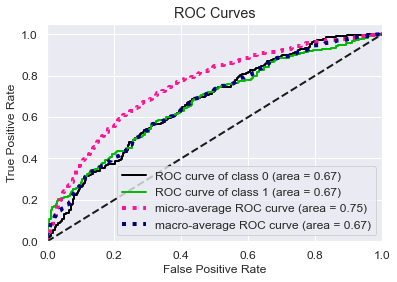

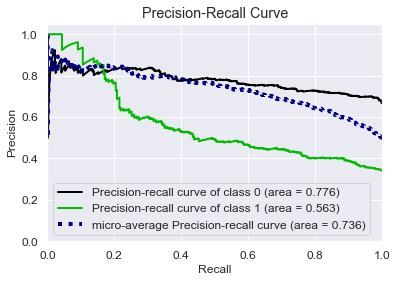

In [30]:
import scikitplot as skplt # $ pip install scikit-plot
y_probas = rf_random.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_precision_recall(y_test, y_probas)

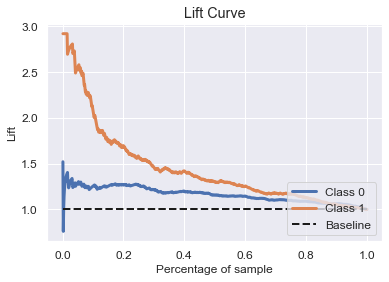

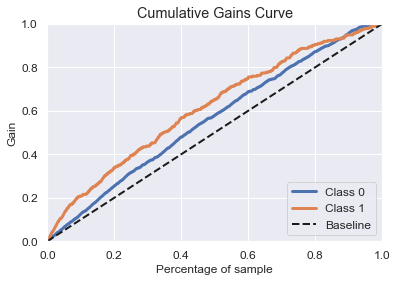

In [31]:
skplt.metrics.plot_lift_curve(y_test, y_probas)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)

In [32]:
from sklearn.metrics import log_loss
log_loss(y_test, y_probas)

0.5915694423035095

In [33]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, y_probas[:,1])

0.20221036128136022

In [34]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_predict)

0.2238682406279699

In [35]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_predict)

0.1941827054272277

KstestResult(statistic=0.19375, pvalue=1.527841475802794e-13)

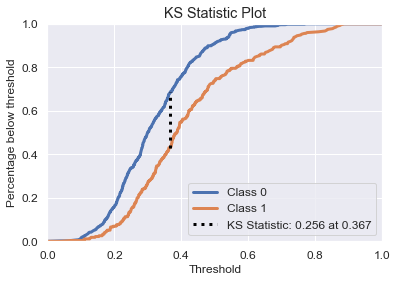

In [36]:
skplt.metrics.plot_ks_statistic(y_test, y_probas)
from scipy.stats import ks_2samp
ks_2samp(y_test, y_predict)

In [74]:
X_train

,embarked,sex,pclass,age,fare
397,S,male,2.0,54.0,26.0000
1170,S,male,3.0,NaN,69.5500
1055,S,male,3.0,NaN,7.8958
297,C,female,1.0,NaN,79.2000
579,S,male,2.0,23.0,10.5000
...,...,...,...,...,...
725,Q,female,3.0,22.0,7.7500
68,C,male,1.0,45.0,29.7000
1089,S,male,3.0,20.0,9.2250
1268,S,male,3.0,NaN,9.5000


In [97]:
from sklearn.base import BaseEstimator, TransformerMixin

In [98]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        X_train['fare_qcut'] = pd.qcut(X_train['fare'], 3, labels=["good", "medium", "bad"])
        return X_train

In [ ]:
attr_adder = CombinedAttributesAdder()
X_extra_attribs = attr_adder.transform(X.values)

X_extra_attribs = pd.DataFrame(
    X_extra_attribs,
    columns=list(X.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)

X_extra_attribs.head()

In [ ]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
attr_adder = CombinedAttributesAdder()
X_extra_attribs = attr_adder.transform(X.values)
X_extra_attribs = pd.DataFrame(
    X_extra_attribs,
    columns=list(X.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)

X_extra_attribs.head()

In [79]:
X_train.head(3)

,embarked,sex,pclass,age,fare
397,S,male,2.0,54.0,26.0000
1170,S,male,3.0,NaN,69.5500
1055,S,male,3.0,NaN,7.8958


In [84]:
X_train['fare'].quantile?

Object `quantile` not found.


In [85]:
X_train['fare'].quantile?

Object `quantile` not found.


In [86]:
X_train['fare'].quantile?

Object `quantile` not found.


In [92]:
pd.qcut(X_train['fare'], 3, labels=["good", "medium", "bad"])

397     medium
1170       bad
1055      good
297        bad
579     medium
         ...  
725       good
68         bad
1089    medium
1268    medium
994       good
Name: fare, Length: 1047, dtype: category
Categories (3, object): [good < medium < bad]

In [80]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
transformer.fit(X)
transformer.transform(X)

ValueError: could not convert string to float: 'S'